In [130]:
import numpy as np 
import os
from scipy import stats
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [131]:
n_samples = 500
x = np.random.random((n_samples, 2))
x = np.sort(x)

In [132]:
def random_sample(arr: np.array, n) -> np.array:
    index = np.random.choice(arr.shape[0], n, replace=False)
    return arr[index]

def metric(x1,x2):
  return np.sqrt(np.sum((x1-x2)**2))

def kmeans(x, K):
    s = 0
    y = np.zeros(len(x))-1
    P_prev = random_sample(x, K)
    P = random_sample(x, K)
    while not (P == P_prev).all():
        P_prev = np.copy(P)
        for etl_indx in range(len(P)):
            dists = np.array([metric(P[etl_indx], x_t) for x_t in x]) 
            neith = dists.argsort()
            finaly_indx = -1
            for neith_indx in neith:
                if y[neith_indx] == -1:
                    finaly_indx = neith_indx
                    break

            if finaly_indx != -1:
                y[finaly_indx] = etl_indx
        
        for etl_indx in range(len(P)):
            x_etlons = x[y == etl_indx]
            P[etl_indx] = np.average(x_etlons)
    return y, P


In [133]:
y_means, centers = kmeans(x, 2)

In [134]:
def maxima(x):
    s = 0
    y = np.zeros(len(x))-1
    K_prev = 0
    K = 1
    P = [x[0]]
    y[0] = 0

    dists = np.array([metric(P[0], x_t) for x_t in x]) 
    neith = dists.argmax()
    y[neith] = 0
    P.append(x[neith])
    T = dists[neith]/2
    K += 1

    while not K == K_prev:
        K_prev = K
        for el_indx in range(len(x)):
            dists = np.array([metric(x[el_indx], p) for p in P]) 
            neith = dists.argmin()
            y[el_indx] = neith
        
        for etl_indx in range(len(P)):
            x_etlons = x[y == etl_indx]         
            dists = np.array([metric(x_t, P[etl_indx]) for x_t in x_etlons]) 
            neith = dists.argmax()
            if dists[neith] > T:
                P.append(x_etlons[neith])
                K += 1
        
        S = 0
        for i in range(len(P) - 1):
            for j in range(i + 1,len(P)):
                S += metric(P[i], P[j])
        
        T = S / (K * (K -1))
        print('K count', K)
        print('T value', T)
    



    return y, P

In [135]:
y_maxima, centers = maxima(x)

K count 4
T value 0.290899003460226
K count 8
T value 0.3096023572828949
K count 8
T value 0.3096023572828949


In [136]:
tsne = TSNE(2)
x_draw = tsne.fit_transform(x)

c:\Users\ivan_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\ivan_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


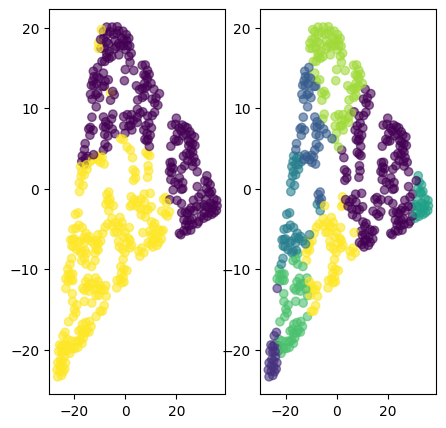

In [137]:

plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_draw[:, 0], x_draw[:, 1], c = y_means, alpha = 0.6)
plt.subplot(1, 2, 2)
plt.scatter(x_draw[:, 0], x_draw[:, 1], c = y_maxima, alpha = 0.6)
plt.show()